In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
# import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook
%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

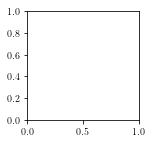

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [3]:
job_dir = 'ecoC01B05_wt0.5_psi_rada'
# table_name = 'ecoC01B05_tao1_wm0'
t_headle = '(.*?).pickle'

In [19]:
t_dir = os.path.join(PWD, job_dir)
_ = spf_tb.load_rand_data_pickle_dir(t_dir, t_headle, rand_mode=True)
ini_theta_list, ini_phi_list, ini_psi_list, theta_max_fre_list, phi_max_fre_list, psi_max_fre_list, pickle_path_list = _
pickle_path_list = np.array(pickle_path_list)

-ini_theta 1.888609 -ini_phi 1.914703 -ini_psi 2.703132


/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


True

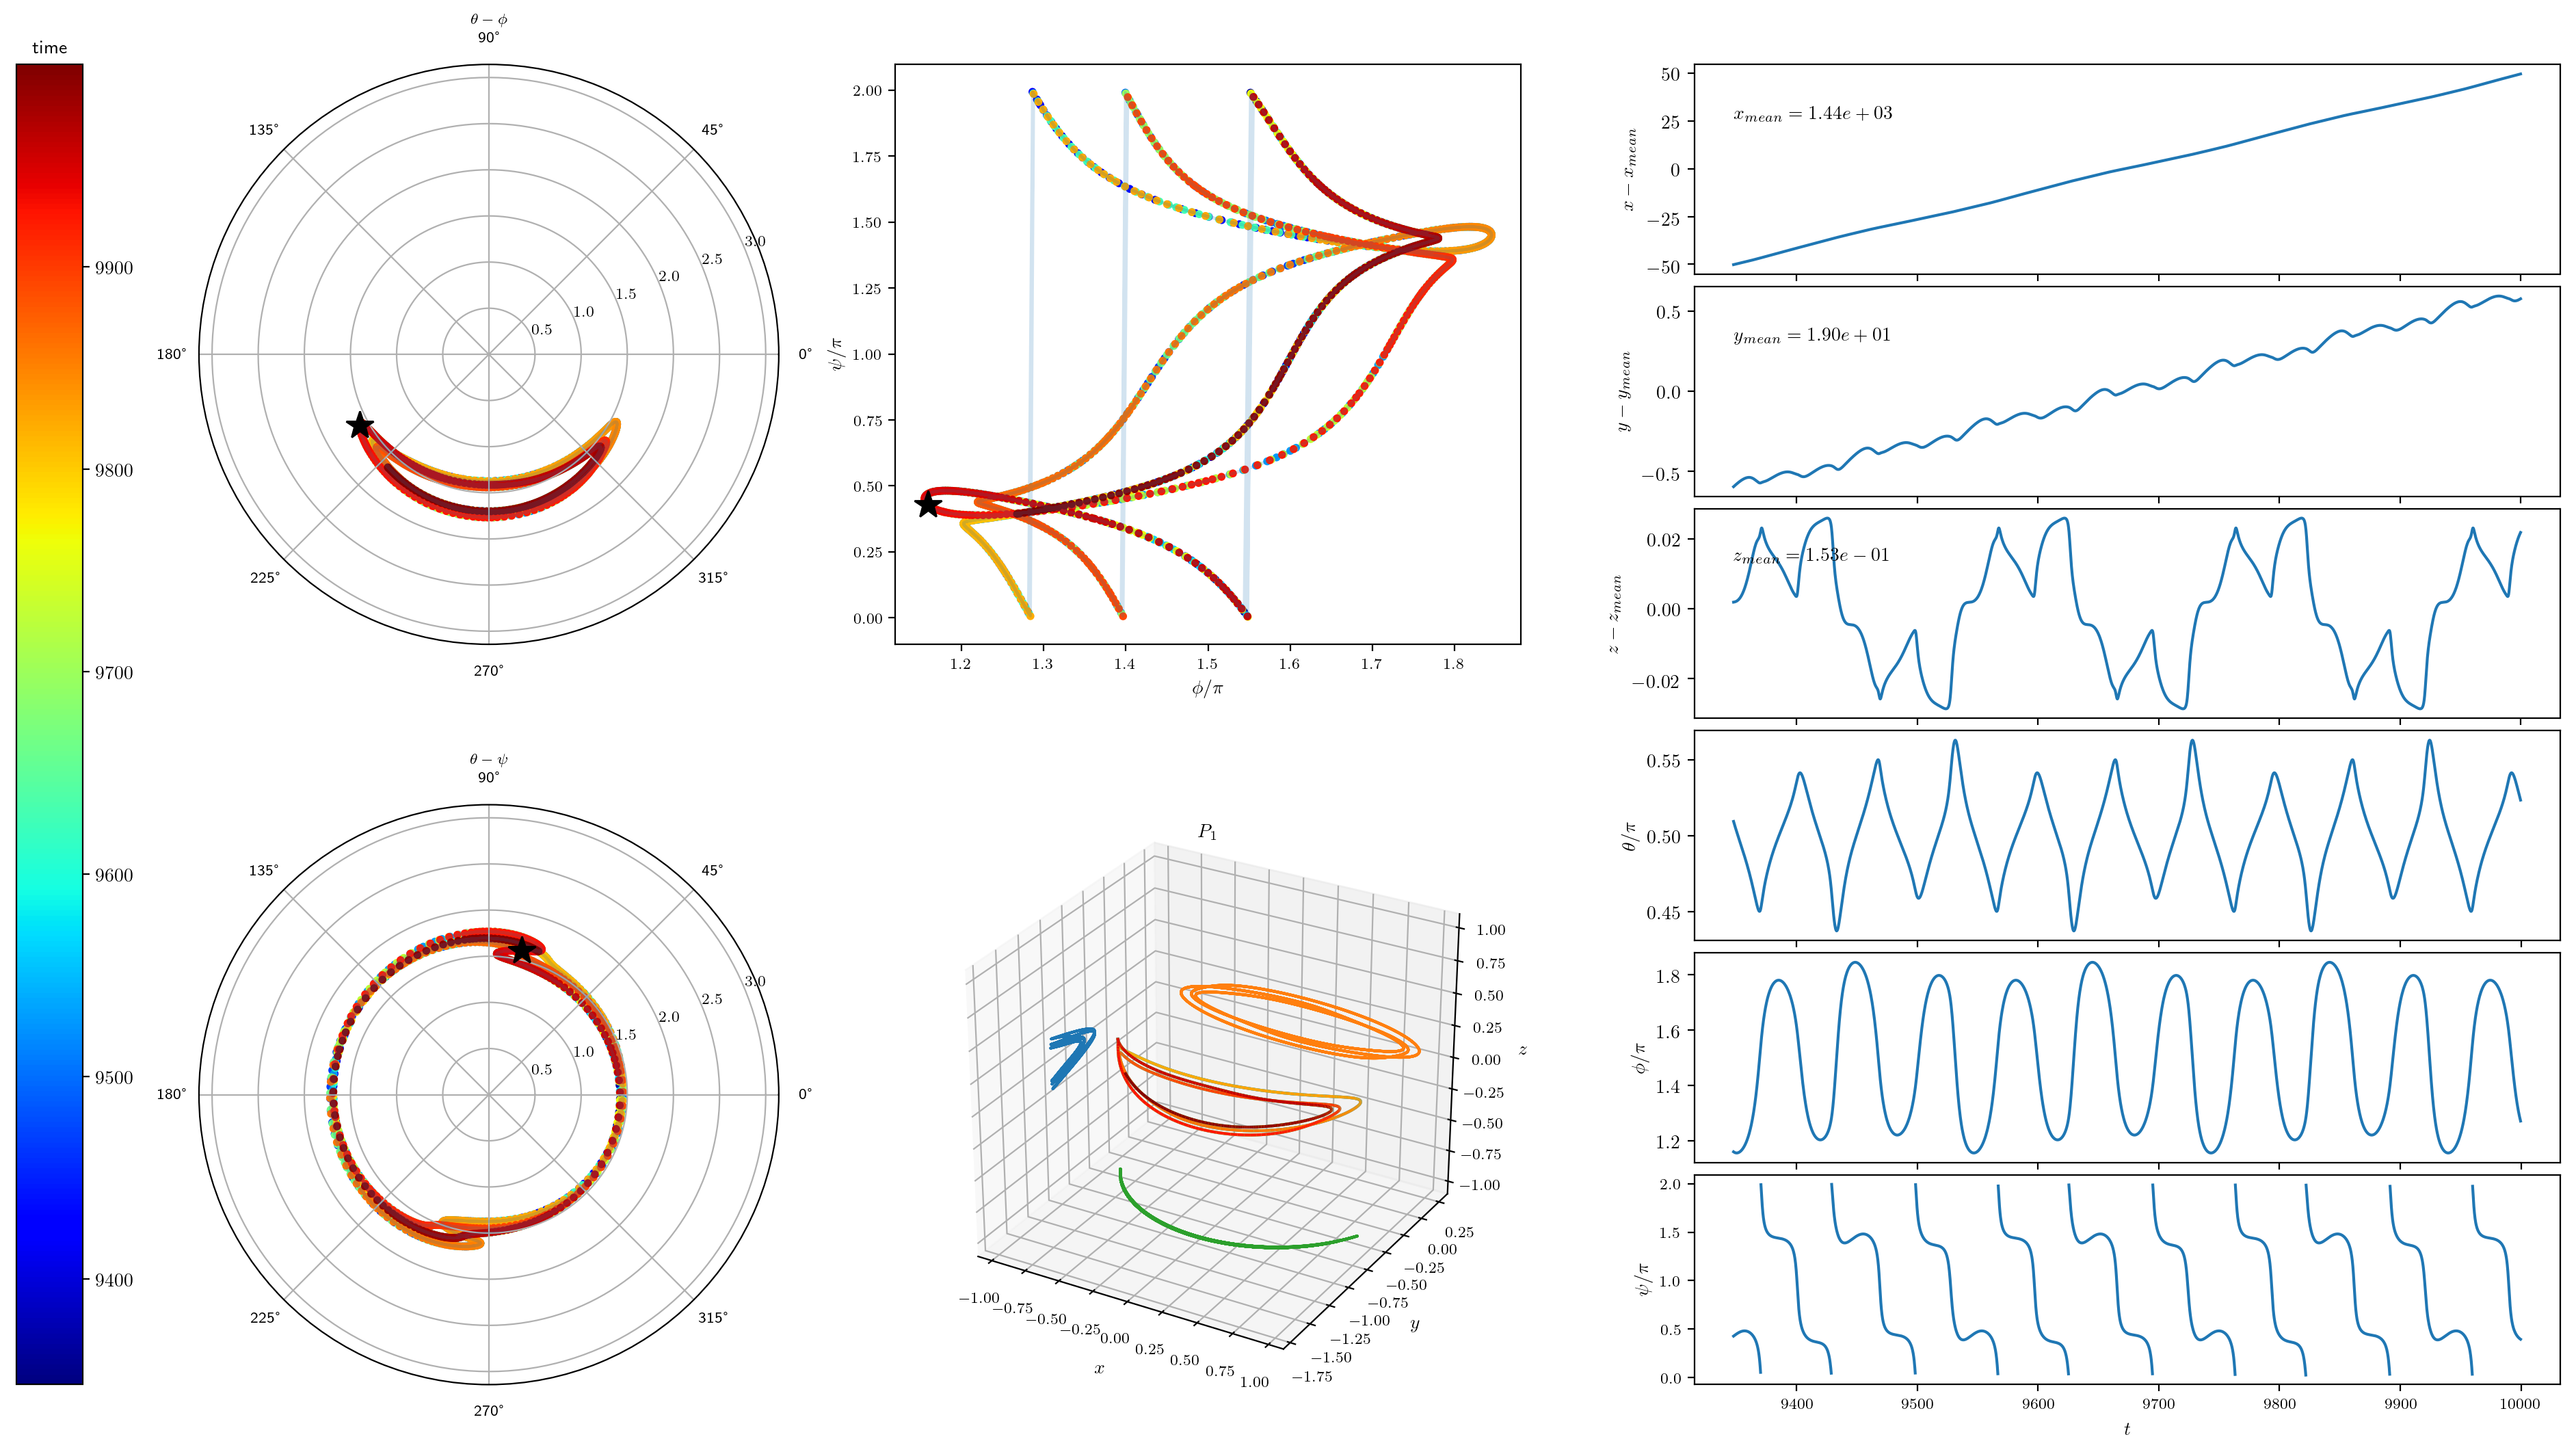

In [20]:
pickle_path = pickle_path_list[0]
with open(pickle_path, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']
print('-ini_theta %f -ini_phi %f -ini_psi %f' % 
      (tpick['Table_theta'][0], tpick['Table_phi'][0], tpick['Table_psi'][0]))

freq_pk = spf_tb.get_major_fre(Table_t, Table_theta)
idx = Table_t > Table_t.max() - 1 / freq_pk * 10
spf_tb.show_table_result_v2(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                         Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx], dpi=200)
# spf_tb.show_theta_phi(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
#                       Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx], show_back_direction=False)
# spf_tb.show_theta_phi_psi_eta(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
#                               Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])

In [21]:
check_fre_list = [0.0150, 0.0190]
atol_fre_list =  [0.0002, 0.0002]
Table_t_range = np.array((9000, np.inf))

def sub_seperate_a(pickle_path_list, Table_t_range):
    t1 = np.zeros(pickle_path_list.shape)
    return t1

def sub_seperate_0(pickle_path_list, Table_t_range):
    tuse = []
    for pickle_path in tqdm_notebook(pickle_path_list, desc='No. %d  ' % i1):
        with open(pickle_path, 'rb') as handle:
            tpick = pickle.load(handle)
        Table_t = tpick['Table_t']
        Table_theta = tpick['Table_theta']
        Table_phi = tpick['Table_phi']
        Table_psi = tpick['Table_psi']
        
        idx = np.logical_and(Table_t >= Table_t_range[0], Table_t <= Table_t_range[1])
        tuse.append(np.max(Table_phi[idx]))
    tuse = np.hstack(tuse)
    t1 = np.ones_like(tuse)
    t1[tuse > 5.7] = 0
    t1[tuse < 5.674] = 2
    return t1

def sub_seperate_1(pickle_path_list, Table_t_range):
    tuse = []
    for pickle_path in tqdm_notebook(pickle_path_list, desc='No. %d  ' % i1):
        with open(pickle_path, 'rb') as handle:
            tpick = pickle.load(handle)
        Table_t = tpick['Table_t']
        Table_theta = tpick['Table_theta']
        Table_phi = tpick['Table_phi']
        Table_psi = tpick['Table_psi']
        
        idx = np.logical_and(Table_t >= Table_t_range[0], Table_t <= Table_t_range[1])
        tuse.append(np.max(Table_phi[idx]))
    tuse = np.hstack(tuse)
    t1 = np.ones_like(tuse)
    t1[tuse < 5.3] = 0
    return t1

sub_seperate = {0: sub_seperate_0, 
                1: sub_seperate_1, 
                'other': sub_seperate_a, }

tfre = np.array(theta_max_fre_list)
type_fre = -1 * np.ones_like(tfre)
check_fre = check_fre_list
atol_fre = atol_fre_list
i0 = 0
for i1, (check_fre, atol_fre) in enumerate(zip(check_fre_list[:], atol_fre_list)):
    use_idx = np.isclose(tfre, check_fre, rtol=0, atol=atol_fre)
    t1 = sub_seperate[i1](pickle_path_list[use_idx], Table_t_range)
    type_fre[use_idx] = i0 + t1
    i0 = i0 + 1 + (t1.max() if t1.size > 0 else 0)
    
if np.any(type_fre < 0):
    use_idx = type_fre < 0
    t1 = sub_seperate['other'](pickle_path_list[use_idx], Table_t_range)
    type_fre[use_idx] = i0 + t1
    
assert np.any(type_fre > 0)
type_fre2 = type_fre.copy()
type_fre2[type_fre == 0] = 0
type_fre2[type_fre == 1] = 1
type_fre2[type_fre == 2] = 0
type_fre2[type_fre == 3] = 2
type_fre2[type_fre == 4] = 3
type_fre2[type_fre == 5] = 2


In [22]:
for i0 in np.arange(type_fre2.max() + 1):
    print('%02d, %8d, %15.4f' % (i0, (type_fre2 == i0).sum(), (type_fre2 == i0).sum() / type_fre2.size))

00,     6130,          0.6347
01,     3047,          0.3155
02,      471,          0.0488
03,       10,          0.0010


In [36]:
5913 / 5918

0.9991551199729638

In [24]:
use_idx = type_fre2 == 2

lst_ph_list = []
for pickle_path in tqdm_notebook(pickle_path_list[use_idx]):
    with open(pickle_path, 'rb') as handle:
        tpick = pickle.load(handle)
    Table_theta = tpick['Table_theta']
    Table_phi = tpick['Table_phi']
    lst_ph_list.append(Table_phi[-1])

458


(array([ 13.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 234., 221.]),
 array([0.45061125, 0.56753766, 0.68446407, 0.80139048, 0.91831689,
        1.0352433 , 1.15216971, 1.26909612, 1.38602253, 1.50294894,
        1.61987535]),
 <a list of 10 Patch objects>)

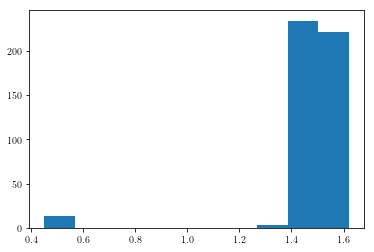

In [29]:
lst_ph_list = np.array(lst_ph_list)
print((lst_ph_list > np.pi).sum())
plt.hist(lst_ph_list / np.pi)

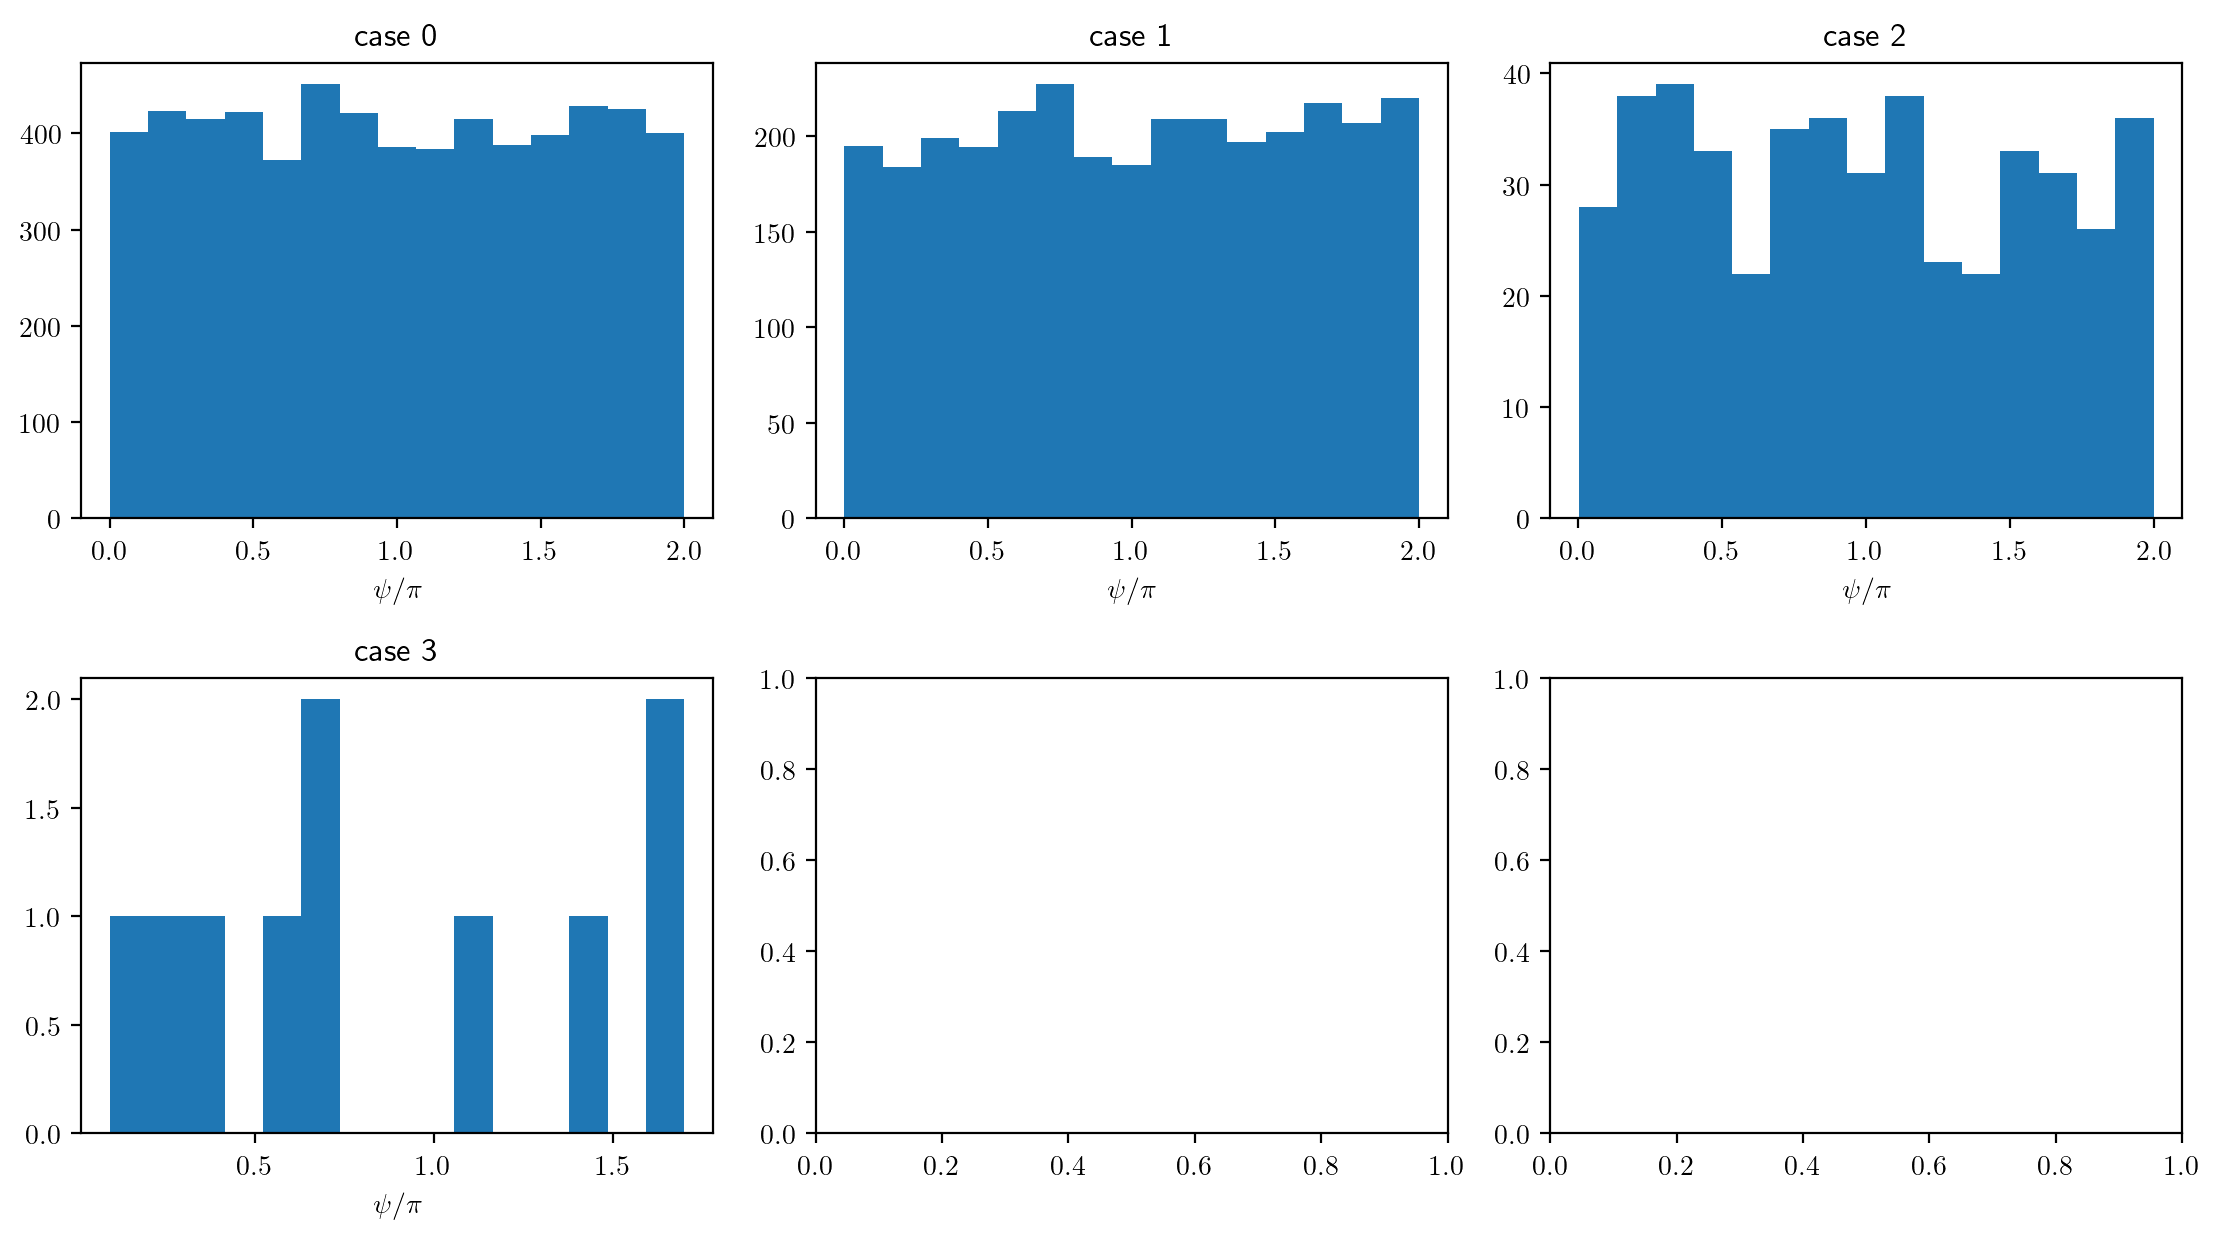

In [26]:
figsize = np.array((16, 9)) * 0.7
dpi = 200

ini_psi_list = np.array(ini_psi_list)
fig, axs = plt.subplots(2, 3, figsize=figsize, dpi=dpi)
for i0, axi in zip(np.arange(type_fre2.max() + 1), axs.ravel()):
    axi.hist(ini_psi_list[type_fre2 == i0] / np.pi, 15)
    axi.set_title('case %d' % i0)
    axi.set_xlabel('$\\psi / \\pi$')
plt.tight_layout()

In [ ]:
psi_lim_fct = 20
resampling_fct = 10
phase_mape_dir = 'phase_mape_freb'
figsize = np.array((16, 9)) * 0.7
dpi = 200

tdir = os.path.join(PWD, job_dir, phase_mape_dir)
if not os.path.exists(tdir):
    os.makedirs(tdir)
for idx, psi_lim1 in enumerate(np.linspace(0, 2 * np.pi, psi_lim_fct * 16, endpoint=False)[::psi_lim_fct]):
    psi_lim = (psi_lim1, psi_lim1 + 2 * np.pi / (psi_lim_fct * 16))
    # create fig
    desc = '$\\psi \\in [%.3f \\pi, %.3f \\pi)$' % ((psi_lim[0] / np.pi), (psi_lim[1] / np.pi))
    fig, ax1 = plt.subplots(1, 1, figsize=figsize, dpi=dpi, subplot_kw=dict(polar=True))
    n_xticks = 32
    xticks = np.arange(n_xticks)
    ax1.set_xticks(xticks / n_xticks * 2 * np.pi)
    ax1.set_xticklabels(['$\dfrac{%d}{%d}2\pi$' % (i0, n_xticks) for i0 in xticks])
    ax1.set_yticklabels([])
    ax1.set_ylim(0, np.pi)
    fig.suptitle(desc)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    
    for i0 in np.arange(type_fre2.max() + 1):
        use_idx = np.isclose(type_fre2, i0)
        case_path = pickle_path_list[use_idx]
        thandle = ''
        color = np.array(plt.get_cmap('tab20', int(type_fre2.max() + 1))(int(i0))[:3]).reshape((1, 3)) 
        spf_tb.draw_phase_map_theta(case_path, color, psi_lim, axs=[ax1, ], thandle=thandle, 
                                    resampling=True, resampling_fct=resampling_fct)
    figname = os.path.join(tdir, '%04d.png' % (idx))
    fig.savefig(os.path.join(tdir, figname))
    print('save to %s' % figname)
    plt.close(fig)


save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_freb/0000.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_freb/0001.png


In [28]:
psi_lim_fct = 20
resampling_fct = 10
type_idx_list = np.arange(type_fre2.max() + 1)
figsize = np.array((16, 9)) * 0.7
dpi = 200

for type_idx in type_idx_list:
    phase_mape_dir = 'phase_mape_fre_%02d' % type_idx
    tdir = os.path.join(PWD, job_dir, phase_mape_dir)
    if not os.path.exists(tdir):
        os.makedirs(tdir)
    for idx, psi_lim1 in enumerate(np.linspace(0, 2 * np.pi, psi_lim_fct * 16, endpoint=False)[::psi_lim_fct]):
        psi_lim = (psi_lim1, psi_lim1 + 2 * np.pi / (psi_lim_fct * 16))
        # create fig
        desc = '$\\psi \\in [%.3f \\pi, %.3f \\pi)$' % ((psi_lim[0] / np.pi), (psi_lim[1] / np.pi))
        fig, ax1 = plt.subplots(1, 1, figsize=figsize, dpi=dpi, subplot_kw=dict(polar=True))
        n_xticks = 32
        xticks = np.arange(n_xticks)
        ax1.set_xticks(xticks / n_xticks * 2 * np.pi)
        ax1.set_xticklabels(['$\dfrac{%d}{%d}2\pi$' % (i0, n_xticks) for i0 in xticks])
        ax1.set_yticklabels([])
        ax1.set_ylim(0, np.pi)
        fig.suptitle(desc)
        fig.tight_layout(rect=[0, 0, 1, 0.95])

    #     for i0 in np.arange(type_fre2.max() + 1):
        for i0 in (type_idx, ):
            use_idx = np.isclose(type_fre2, i0)
            case_path = pickle_path_list[use_idx]
            thandle = ''
            color = np.array(plt.get_cmap('tab20', int(type_fre2.max() + 1))(int(i0))[:3]).reshape((1, 3)) 
            spf_tb.draw_phase_map_theta(case_path, color, psi_lim, axs=[ax1, ], thandle=thandle, 
                                        resampling=True, resampling_fct=resampling_fct)
        figname = os.path.join(tdir, '%04d.png' % (idx))
        fig.savefig(os.path.join(tdir, figname))
        print('save to %s' % figname)
        plt.close(fig)


save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0000.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0001.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0002.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0003.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0004.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0005.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0006.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0007.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0008.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0009.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0010.png


save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0011.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0012.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0013.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0014.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_00/0015.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0000.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0001.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0002.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0003.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0004.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0005.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0006.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0007.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0008.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0009.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0010.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0011.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0012.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0013.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0014.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_01/0015.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0000.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0001.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0002.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0003.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0004.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0005.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0006.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0007.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0008.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0009.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0010.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0011.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0012.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0013.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0014.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_02/0015.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0000.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0001.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0002.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0003.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0004.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0005.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0006.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0007.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0008.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0009.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0010.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0011.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0012.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0013.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0014.png



save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.5_psi_rada/phase_mape_fre_03/0015.png
